#  Support vector machine

1. Import the Dataset Download the iris ower dataset and import the csv file.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

attributes=["sp len","sp wd","pt len","pt wd","class"]
df=pd.read_csv("iris.data",names=attributes)
print(df.head())
print(df["class"].value_counts())

   sp len  sp wd  pt len  pt wd        class
0     5.1    3.5     1.4    0.2  Iris-setosa
1     4.9    3.0     1.4    0.2  Iris-setosa
2     4.7    3.2     1.3    0.2  Iris-setosa
3     4.6    3.1     1.5    0.2  Iris-setosa
4     5.0    3.6     1.4    0.2  Iris-setosa
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64


2. Split the Dataset Split the dataset into 4 parts. Training data, Training
target, Test data and Test target. Split the data in such a way that the set
(Training Data, Training Target) has 75% of the total dataset and (Test
Data, Test Target) comprises of the rest of the dataset. Use scikit-learn
for this.

In [2]:
def normalize(a):
    a_min=min(a)
    a_max=max(a)
    range=a_max-a_min
    return((a-a_min)/range)
spln=normalize(df["sp len"])
spwn=normalize(df["sp wd"])
ptln=normalize(df["pt len"])
ptwn=normalize(df["pt wd"])

df_n=pd.DataFrame(spln)
df_n
df_n.loc[:,"spwn"]=spwn   #adding columns   #for adding in the location
df_n.loc[:,"ptln"]=ptln     
df_n.loc[:,"ptwn"]=ptwn
df_n.loc[:,"class"]=df["class"]
df_n


X=np.asarray(df_n.iloc[:,0:-1])     #fro accesing the location entry
print(X)
Y=np.array(df_n.iloc[:,4])
print(Y)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=18890,test_size=0.25)   #right now random_state is not metion othw it will be fixed
print(x_train,y_train,x_test,y_test)


[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

3. Training the SVM Train a SVM Classifier using scikit-learn. Train the model using the Training Data and Training Target.

In [3]:
#training the classifier

from sklearn import svm
clf=svm.SVC(kernel="linear",gamma="auto",C=12)
clf.fit(x_train,y_train)

SVC(C=12, gamma='auto', kernel='linear')

4. Testing the model Use the trained SVM Classifier to predict the labels on the Test Data.

In [4]:
y_pred=clf.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


5. Performance of model Use the predicted labels from the previous partand the Training Target to create a Confusion Matrix. A confusion matrixis a way to check whether the model has performed well or not on different cases.

In [5]:
#evaluation of the data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)



array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  8]], dtype=int64)

6. Accuracy Report the accuracy of the model from the confusion matrix.Also try the same procedure for the splitting ratio as 80% Train and 20% Test Data.

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

a=classification_report(y_test,y_pred)
b=accuracy_score(y_test,y_pred)
print(a,b)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38
 0.9736842105263158


####                        Repeatting for 80/20 dataset

In [7]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.2)   #right now random_state is not metion othw it will be fixed
print(x1_train,y1_train,x1_test,y1_test)


[[1.         0.75       0.91525424 0.79166667]
 [0.47222222 0.41666667 0.6440678  0.70833333]
 [0.33333333 0.25       0.57627119 0.45833333]
 [0.19444444 0.54166667 0.06779661 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.94444444 0.75       0.96610169 0.875     ]
 [0.58333333 0.33333333 0.77966102 0.875     ]
 [0.38888889 0.20833333 0.6779661  0.79166667]
 [0.69444444 0.41666667 0.76271186 0.83333333]
 [0.38888889 0.33333333 0.59322034 0.5       ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.61111111 0.41666667 0.81355932 0.875     ]
 [0.69444444 0.5        0.83050847 0.91666667]
 [0.         0.41666667 0.01694915 0.        ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.38888889 0.33333333 0.52542373 0.5       ]
 [0.66666667 0.20833333 0.81355932 0.70833333]
 [0.22222222 0.20833333 0.33898305 0.41666667]
 [0.47222222 0.08333333 0.50847458 0.375     ]
 [0.91666667 0.41666667 0.94915254 0.83333333]
 [0.16666667 0.20833333 0.59322034 0.66666667]
 [0.94444444 

In [8]:
clf1=svm.SVC(kernel="linear",gamma="auto",C=1)
clf1.fit(x1_train,y1_train)

#predicting the output classes
y1_pred=clf1.predict(x1_test)
print(y1_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [9]:
confusion_matrix(y1_test,y1_pred)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]], dtype=int64)

In [10]:
accuracy_score(y1_test,y1_pred)     

1.0

# PCA & LDA

1. Import the dataset Download the iris flower dataset
and import it as a csv file.

In [11]:
import matplotlib.pyplot as plt
df=pd.read_csv("iris.data",names=attributes)
print(df.head())

   sp len  sp wd  pt len  pt wd        class
0     5.1    3.5     1.4    0.2  Iris-setosa
1     4.9    3.0     1.4    0.2  Iris-setosa
2     4.7    3.2     1.3    0.2  Iris-setosa
3     4.6    3.1     1.5    0.2  Iris-setosa
4     5.0    3.6     1.4    0.2  Iris-setosa


2. Visualize the Dataset There are 3 classes of iris flowers. Take all the 4 features and create plots pairwise. For example: Take feature1 and feature 2 and plot all the 150 samples in 3 different colors to visualize. You will get a total of 6 different plots like this.

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sp len, Length: 150, dtype: float64 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sp wd, Length: 150, dtype: float64 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: pt len, Length: 150, dtype: float64 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: pt wd, Length: 150, dtype: float64


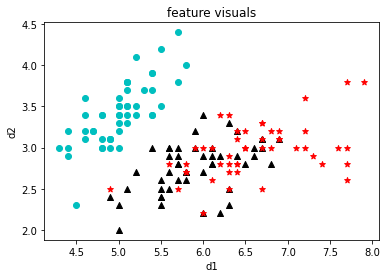

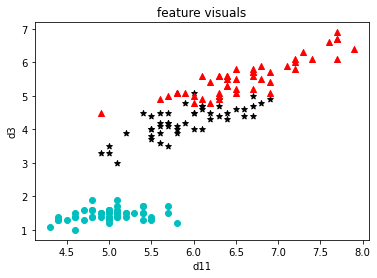

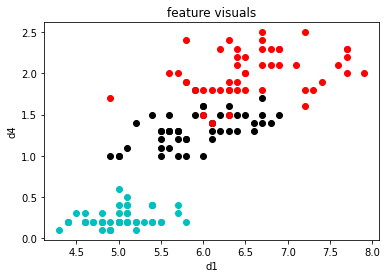

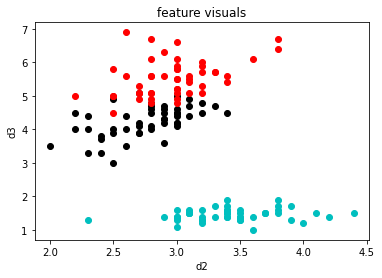

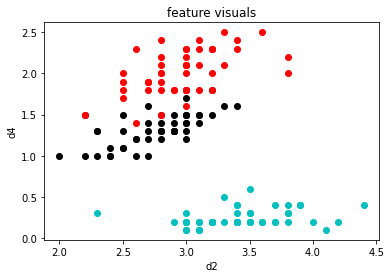

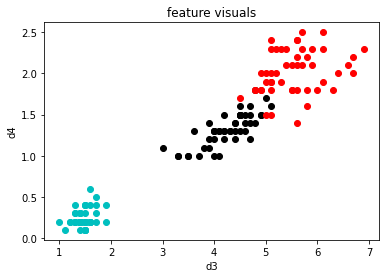

In [12]:

d1=df["sp len"]
d2=df["sp wd"]
d3=df["pt len"]
d4=df["pt wd"]
print(d1,d2,d3,d4)
plt.figure(1)
plt.scatter(d1[0:50],d2[0:50],color="c")
plt.scatter(d1[51:100],d2[51:100],color="k",marker="^")
plt.scatter(d1[101:150],d2[101:150],color="r",marker="*")
plt.xlabel("d1")
plt.ylabel("d2")
plt.title("feature visuals")
plt.show()


plt.figure(2)
plt.scatter(d1[0:50],d3[0:50],color="c")
plt.scatter(d1[51:100],d3[51:100],color="k",marker="*")
plt.scatter(d1[101:150],d3[101:150],color="r",marker="^")
plt.xlabel("d11")
plt.ylabel("d3")
plt.title("feature visuals")
plt.show()


plt.figure(3)
plt.scatter(d1[0:50],d4[0:50],color="c")
plt.scatter(d1[51:100],d4[51:100],color="k")
plt.scatter(d1[101:150],d4[101:150],color="r")
plt.xlabel("d1")
plt.ylabel("d4")
plt.title("feature visuals")
plt.show()

plt.figure(4)
plt.scatter(d2[0:50],d3[0:50],color="c")
plt.scatter(d2[51:100],d3[51:100],color="k")
plt.scatter(d2[101:150],d3[101:150],color="r")
plt.xlabel("d2")
plt.ylabel("d3")
plt.title("feature visuals")
plt.show()

plt.figure(5)
plt.scatter(d2[0:50],d4[0:50],color="c")
plt.scatter(d2[51:100],d4[51:100],color="k")
plt.scatter(d2[101:150],d4[101:150],color="r")
plt.xlabel("d2")
plt.ylabel("d4")
plt.title("feature visuals")
plt.show()

plt.figure(6)
plt.scatter(d3[0:50],d4[0:50],color="c")
plt.scatter(d3[51:100],d4[51:100],color="k")
plt.scatter(d3[101:150],d4[101:150],color="r")
plt.xlabel("d3")
plt.ylabel("d4")
plt.title("feature visuals")
plt.show()











3. Normalize the dataset Normalize the iris flower dataset for training the model. Use min max normalization.

In [13]:
def normalize(a):
    a_min=min(a)
    a_max=max(a)
    range=a_max-a_min
    return((a-a_min)/range)
spln=normalize(df["sp len"])
spwn=normalize(df["sp wd"])
ptln=normalize(df["pt len"])
ptwn=normalize(df["pt wd"])


In [14]:
df_n=pd.DataFrame(spln)
df_n
df_n.loc[:,"spwn"]=spwn   #adding columns
df_n.loc[:,"ptln"]=ptln
df_n.loc[:,"ptwn"]=ptwn
df_n.loc[:,"class"]=df["class"]
df_n.head(50)


,sp len,spwn,ptln,ptwn,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
5,0.305556,0.791667,0.118644,0.125000,Iris-setosa
6,0.083333,0.583333,0.067797,0.083333,Iris-setosa
7,0.194444,0.583333,0.084746,0.041667,Iris-setosa
8,0.027778,0.375000,0.067797,0.041667,Iris-setosa
9,0.166667,0.458333,0.084746,0.000000,Iris-setosa


4. Mean and Covariance Matrix Calculate the Mean vector. The Mean
vector is the mean of all the features so it will be a 4X1 vector. Once you
calculate the Mean vector calculate the Covariance Matrix among the 4
features using the formula.

In [15]:
def mean(b):
    length=len(b)
    su=sum(b)
    return (su/(length-1))
mean_spln=mean(df_n["sp len"])
mean_spwd=mean(df_n["spwn"])
mean_ptlen=mean(df_n["ptln"])
mean_ptwd=mean(df_n["ptwn"])
mean_vec=[mean_spln,mean_spwd,mean_ptlen,mean_ptwd]
mean_vec

[0.43158090976882935,
 0.44211409395973145,
 0.47070867933113414,
 0.4608501118568234]

In [16]:
cen_spln=df_n["sp len"]-mean_vec[0]
cen_spwn=df_n["spwn"]-mean_vec[1]
cen_ptln=df_n["ptln"]-mean_vec[2]
cen_ptwn=df_n["ptwn"]-mean_vec[3]
print(cen_spln,cen_spwn,cen_ptln,cen_ptwn)

0     -0.209359
1     -0.264914
2     -0.320470
3     -0.348248
4     -0.237136
         ...   
145    0.235086
146    0.123975
147    0.179530
148    0.096197
149    0.012864
Name: sp len, Length: 150, dtype: float64 0      0.182886
1     -0.025447
2      0.057886
3      0.016219
4      0.224553
         ...   
145   -0.025447
146   -0.233781
147   -0.025447
148    0.141219
149   -0.025447
Name: spwn, Length: 150, dtype: float64 0     -0.402912
1     -0.402912
2     -0.419861
3     -0.385963
4     -0.402912
         ...   
145    0.241156
146    0.207257
147    0.241156
148    0.275054
149    0.224207
Name: ptln, Length: 150, dtype: float64 0     -0.419183
1     -0.419183
2     -0.419183
3     -0.419183
4     -0.419183
         ...   
145    0.455817
146    0.289150
147    0.330817
148    0.455817
149    0.247483
Name: ptwn, Length: 150, dtype: float64


In [17]:
v11=(cen_spln).dot(cen_spln)/(len(cen_spln)-1)
v12=(cen_spln).dot(cen_spwn)/(len(cen_spwn)-1)    #can be done with loop also, ##large BAM (ASSIGNMENT DEADLINE IS NEAR)
v13=(cen_spln).dot(cen_ptln)/(len(cen_ptln)-1)
v14=(cen_spln).dot(cen_ptwn)/(len(cen_ptwn)-1)
v21=(cen_spwn).dot(cen_spln)/(len(cen_spwn)-1)
v22=(cen_spwn).dot(cen_spwn)/(len(cen_spwn)-1)
v23=(cen_spwn).dot(cen_ptln)/(len(cen_spwn)-1)
v24=(cen_spwn).dot(cen_ptwn)/(len(cen_spwn)-1)
v31=(cen_ptln).dot(cen_spln)/(len(cen_ptln)-1)
v32=(cen_ptln).dot(cen_spwn)/(len(cen_ptln)-1)
v33=(cen_ptln).dot(cen_ptln)/(len(cen_ptln)-1)
v34=(cen_ptln).dot(cen_ptwn)/(len(cen_ptln)-1)
v41=(cen_ptwn).dot(cen_spln)/(len(cen_ptwn)-1)
v42=(cen_ptwn).dot(cen_spwn)/(len(cen_ptwn)-1)
v43=(cen_ptwn).dot(cen_ptln)/(len(cen_ptwn)-1)
v44=(cen_ptwn).dot(cen_ptwn)/(len(cen_ptwn)-1)

cov_mat=[[v11,v12,v13,v14],[v21,v22,v23,v24],[v31,v32,v33,v34],[v41,v42,v43,v44]]
cov_mat=np.array(cov_mat)
print(cov_mat)

[[ 0.05291678 -0.00453642  0.0599753   0.05983573]
 [-0.00453642  0.03264833 -0.02271052 -0.02047373]
 [ 0.0599753  -0.02271052  0.08944339  0.09156249]
 [ 0.05983573 -0.02047373  0.09156249  0.1011231 ]]


Q5. Eigen Decomposition Calculate the Eigen values and Eigen vectors ofthe covariance matrix. The Eigen Vectors denote the
direction of spread and the Eigen Values denote the variance among that direction.

In [18]:
pd.DataFrame(cov_mat)

,0,1,2,3
0,0.052917,-0.004536,0.059975,0.059836
1,-0.004536,0.032648,-0.022711,-0.020474
2,0.059975,-0.022711,0.089443,0.091562
3,0.059836,-0.020474,0.091562,0.101123


In [19]:
eigen_val,eigen_vec=np.linalg.eig(cov_mat)
print(eigen_val)
print(eigen_vec)

[0.23233404 0.03240614 0.00963763 0.0017538 ]
[[ 0.42531179 -0.4208728  -0.71440692  0.36276538]
 [-0.14603682 -0.90476679  0.33502831 -0.21869233]
 [ 0.61610916  0.06432535 -0.06822233 -0.78205976]
 [ 0.64667815  0.01119794  0.61051167  0.45711867]]


6. Principal Components Sort the Eigen values in descending order. Take
the first 2 Eigen Values and the corresponding Eigen Vectors.Create a
Projection Matrix P of size 4X2 using these vectors.

In [20]:
index=[]
ev_sort=np.sort(eigen_val)
for i in range(0,len(eigen_val)):
    for j in range(0,len(ev_sort)):
        if eigen_val[i]== ev_sort[j]:
            index.append(j)   #to print in decreasing order & (-1) for zero indexing
acc_index=index
dec_index=index[::-1]    #slicing operation 
print(dec_index)



P=eigen_vec[dec_index[0]],eigen_vec[dec_index[1]]
P=np.asarray(P)
print(P)


[0, 1, 2, 3]
[[ 0.42531179 -0.4208728  -0.71440692  0.36276538]
 [-0.14603682 -0.90476679  0.33502831 -0.21869233]]


In [21]:
pd.DataFrame(P)

,0,1,2,3
0,0.425312,-0.420873,-0.714407,0.362765
1,-0.146037,-0.904767,0.335028,-0.218692


7. Projecting to new feature space Project the original normalized dataset using the matrix P to a new feature space such 
that the data has only 2 features. Use the relation: Y = XxP where Y is the new projected dataset with 2 features,
X is the original dataset with 4 features and P is the 4X2 projection matrix.

In [22]:
P=P.reshape(4,2)
P


array([[ 0.42531179, -0.4208728 ],
       [-0.71440692,  0.36276538],
       [-0.14603682, -0.90476679],
       [ 0.33502831, -0.21869233]])

In [23]:
feature_space=np.array(df_n)
feat=feature_space[:,:-1]
print(feat)

[[0.22222222222222213 0.6249999999999999 0.06779661016949151
  0.04166666666666667]
 [0.1666666666666668 0.41666666666666663 0.06779661016949151
  0.04166666666666667]
 [0.11111111111111119 0.5 0.05084745762711865 0.04166666666666667]
 [0.08333333333333327 0.4583333333333333 0.0847457627118644
  0.04166666666666667]
 [0.19444444444444448 0.6666666666666666 0.06779661016949151
  0.04166666666666667]
 [0.30555555555555564 0.7916666666666665 0.11864406779661016
  0.12500000000000003]
 [0.08333333333333327 0.5833333333333333 0.06779661016949151
  0.08333333333333333]
 [0.19444444444444448 0.5833333333333333 0.0847457627118644
  0.04166666666666667]
 [0.027777777777777922 0.3749999999999999 0.06779661016949151
  0.04166666666666667]
 [0.1666666666666668 0.4583333333333333 0.0847457627118644 0.0]
 [0.30555555555555564 0.7083333333333333 0.0847457627118644
  0.04166666666666667]
 [0.13888888888888887 0.5833333333333333 0.1016949152542373
  0.04166666666666667]
 [0.13888888888888887 0.41666666

In [24]:
Y=np.matmul(feat,P)
print("The projected new feature space is",Y)

The projected new feature space is [[-0.34793188466730135 0.06274877078227559]
 [-0.2227255417994333 0.010554472515450735]
 [-0.3034126842924051 0.07950177315735449]
 [-0.2904103462773134 0.0454073994878291]
 [-0.38951305610380776 0.08955490593819893]
 [-0.4110636316485176 0.023907481800088587]
 [-0.36327649841965853 0.09697592151442963]
 [-0.3324543462721685 0.043989427442807094]
 [-0.25202966834692453 0.05389380379906333]
 [-0.2689272100804486 0.019446846819519595]
 [-0.3744983462670238 0.042571455397785174]
 [-0.3585579793135421 0.05203621925926205]
 [-0.24849927092523383 0.031357564140165356]
 [-0.3001447514384422 0.1358172104966165]
 [-0.4091167451217559 0.08715857434293445]
 [-0.5195053574256373 0.09508092965377155]
 [-0.4011628301283535 0.08524760312031679]
 [-0.33397237187216716 0.05363659023081702]
 [-0.35981354034581264 -0.017168294950888167]
 [-0.4257484375697284 0.08364723214876196]
 [-0.29014788170958533 -0.03344427751033102]
 [-0.3820219696687543 0.05941982751463609]
 [-0

8. Final Visualization Plot the final reduced dataset Y with the 2 principal
components and visualize the result. Use 3 different colours for the 3
classes.

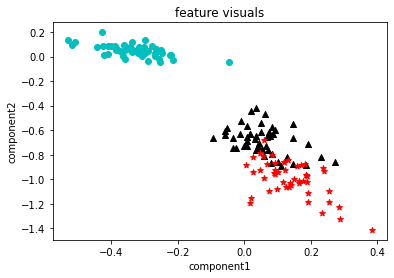

In [25]:
comp1=Y[:,0]
comp2=Y[:,1]
plt.figure()
plt.scatter(comp1[0:50],comp2[0:50],color="c")
plt.scatter(comp1[51:100],comp2[51:100],color="k",marker="^")
plt.scatter(comp1[101:152],comp2[101:151],color="r",marker="*")
plt.xlabel("component1")
plt.ylabel("component2")
plt.title("feature visuals")
plt.show()